In [1]:
import pandas as pd
import matplotlib.pyplot as plt

$ \huge{1.}$ \
The code is implemented below:

In [2]:
data=pd.read_csv('/content/haberman (1).data',header=None)
data.head()

0   1  2  3
0  30  64  1  1
1  30  62  3  1
2  30  65  0  1
3  31  59  2  1
4  31  65  4  1

In [3]:
data.columns=['X1','X2','X3','Y']
data

X1  X2  X3  Y
0    30  64   1  1
1    30  62   3  1
2    30  65   0  1
3    31  59   2  1
4    31  65   4  1
..   ..  ..  .. ..
301  75  62   1  1
302  76  67   0  1
303  77  65   3  1
304  78  65   1  2
305  83  58   2  2

[306 rows x 4 columns]

In [4]:
X=data.drop('Y',axis=1)
Y=data['Y']

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [6]:
scaling=StandardScaler()
scaling.fit(X)
scaled_data=scaling.transform(X)

In [7]:
pca = PCA(n_components=2)
pca.fit(X)
x=pca.transform(scaled_data)
print(x.shape)
print(pca.components_)

(306, 2)
[[ 0.99676878  0.029445   -0.07473276]
 [ 0.0746588   0.00360473  0.99720262]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [8]:
X = pd.DataFrame(x,columns=['X1','X2'])

In [9]:
K_vals = [1,2,3,4,5]
def KNN(size):
  l1accu = []
  l2accu = []
  print("For test split",size)
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size, random_state=49)
  for k in K_vals:
    print("k =",k)
    pens=['l1','l2']
    for mtr in pens:
      clf = KNeighborsClassifier(n_neighbors = k, metric = mtr)
      clf.fit(X_train, y_train)
      accu = clf.score(X_test, y_test)
      if mtr=='l1':
        l1accu.append(accu)
        print('L1 score = ',accu)
      else:
        l2accu.append(accu)
        print('L2 score = ',accu)
  plt.plot(K_vals,l1accu,color='red')
  plt.plot(K_vals,l2accu,color='blue')
  plt.xlabel('K-values')
  plt.ylabel('Accuracy')
  plt.legend(['L1 metric','L2 metric'],loc='lower right')
  plt.grid()
  plt.show()

For test split 0.2
k = 1
L1 score =  0.6290322580645161
L2 score =  0.6451612903225806
k = 2
L1 score =  0.6935483870967742
L2 score =  0.7096774193548387
k = 3
L1 score =  0.7258064516129032
L2 score =  0.7419354838709677
k = 4
L1 score =  0.7580645161290323
L2 score =  0.7580645161290323
k = 5
L1 score =  0.7258064516129032
L2 score =  0.7096774193548387


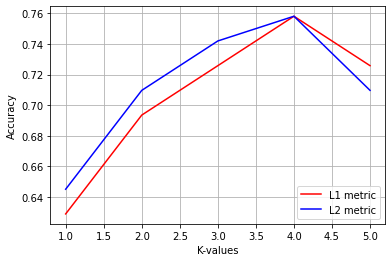

In [10]:
KNN(0.2)

For test split 0.4
k = 1
L1 score =  0.5934959349593496
L2 score =  0.6097560975609756
k = 2
L1 score =  0.7235772357723578
L2 score =  0.7398373983739838
k = 3
L1 score =  0.6991869918699187
L2 score =  0.6991869918699187
k = 4
L1 score =  0.7479674796747967
L2 score =  0.7317073170731707
k = 5
L1 score =  0.6666666666666666
L2 score =  0.6910569105691057


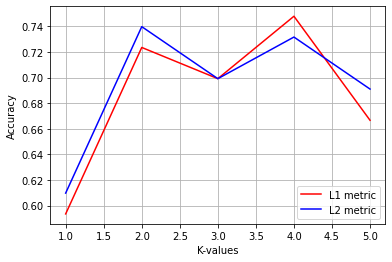

For test split 0.3
k = 1
L1 score =  0.6086956521739131
L2 score =  0.6195652173913043
k = 2
L1 score =  0.7065217391304348
L2 score =  0.7282608695652174
k = 3
L1 score =  0.7282608695652174
L2 score =  0.717391304347826
k = 4
L1 score =  0.75
L2 score =  0.75
k = 5
L1 score =  0.6739130434782609
L2 score =  0.6847826086956522


For test split 0.1
k = 1
L1 score =  0.7419354838709677
L2 score =  0.7741935483870968
k = 2
L1 score =  0.7741935483870968
L2 score =  0.7741935483870968
k = 3
L1 score =  0.8387096774193549
L2 score =  0.8709677419354839
k = 4
L1 score =  0.8709677419354839
L2 score =  0.8709677419354839
k = 5
L1 score =  0.9032258064516129
L2 score =  0.8709677419354839


In [52]:
sizes=[0.4,0.3,0.1]
for size in sizes:
  KNN(size)

In [14]:
pca.components_

array([[ 0.99676878,  0.029445  , -0.07473276],
       [ 0.0746588 ,  0.00360473,  0.99720262]])

$ \huge{2.}$ \
The code is implemented below:

In [15]:
from sklearn.datasets import fetch_california_housing

In [16]:
california_housing = fetch_california_housing(as_frame=True)

In [17]:
data=california_housing.frame

In [18]:
data

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

In [19]:
columns=data.columns

In [20]:
scaling=StandardScaler()
scaling.fit(data)
scaled_data=scaling.transform(data)

In [21]:
pca=PCA(n_components=2)
pca.fit(scaled_data)
x1=pca.transform(scaled_data)
print(x1.shape)
print(pca.components_)

(20640, 2)
[[ 0.24780531 -0.03906526  0.56020039  0.47047838 -0.14594709 -0.01550618
   0.4236291  -0.40849806  0.18444183]
 [ 0.39894903 -0.17439134  0.3159562   0.20737551  0.1187762   0.00234477
  -0.52645869  0.50171703  0.35299064]]


In [22]:
x1 = pd.DataFrame(x1, columns=['X1','X2'])

In [23]:
x11=x1.copy()
x12=x1.copy()

In [19]:
# df1=scaled_data.copy()
# df2=scaled_data.copy()
# df1=pd.DataFrame(df1,columns=columns)
# df2=pd.DataFrame(df2,columns=columns)

In [24]:
from sklearn.cluster import KMeans
def KmeansL2(k):
  kmeans = KMeans(n_clusters=k, random_state=49, n_init="auto", tol=1e-3).fit(x11)
  x11[f'k{k}'] = kmeans.labels_

In [25]:
for k in range(2,6):
  KmeansL2(k)

In [26]:
x11

X1        X2  k2  k3  k4  k5
0      2.346543  0.346441   0   0   0   0
1      1.761367  0.438124   0   0   0   0
2      2.330312 -0.126208   0   0   0   0
3      1.537078 -0.810004   0   0   0   0
4      1.416914 -1.121116   0   0   0   0
...         ...       ...  ..  ..  ..  ..
20635  0.602464 -2.251757   0   0   0   0
20636  1.264302 -1.815928   0   0   0   0
20637  0.687380 -2.056770   0   0   0   0
20638  0.828435 -2.073240   0   0   0   0
20639  0.771440 -1.832743   0   0   0   0

[20640 rows x 6 columns]

In [27]:
x11['k2'] = pd.Categorical(x11.k2)
x11['k3'] = pd.Categorical(x11.k3)
x11['k4'] = pd.Categorical(x11.k4)
x11['k5'] = pd.Categorical(x11.k5)

In [28]:
import seaborn as sns

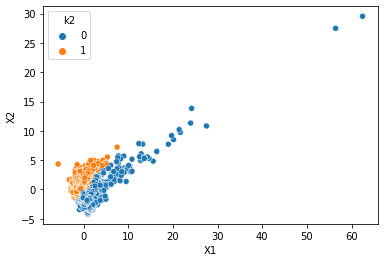

In [30]:
sns.scatterplot(data=x11, x="X1", y="X2", hue = 'k2');


In [31]:
sns.scatterplot(data=x11, x="X1", y="X2", hue = 'k3');


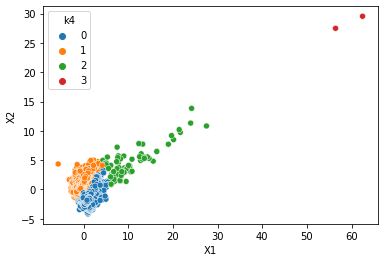

In [32]:
sns.scatterplot(data=x11, x="X1", y="X2", hue = 'k4');


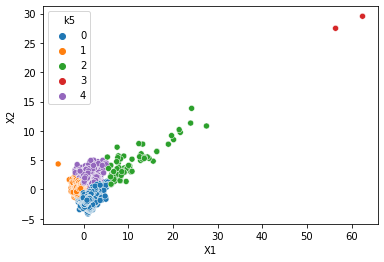

In [33]:
sns.scatterplot(data=x11, x="X1", y="X2", hue = 'k5');

Now for L1

In [34]:
!pip install mlinsights
from mlinsights.mlmodel import KMeansL1L2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.8/114.8 KB 15.0 MB/s eta 0:00:00


In [35]:
def KmeansL1(k):
    kmeans = KMeansL1L2(k, norm='L1',tol = 1e-3,random_state = 49).fit(data)
    x12[f'k{k}'] = kmeans.labels_

In [36]:
for k in range(2,6):
  KmeansL1(k)

In [37]:
x12

X1        X2  k2  k3  k4  k5
0      2.346543  0.346441   1   0   2   1
1      1.761367  0.438124   0   2   1   3
2      2.330312 -0.126208   1   0   2   1
3      1.537078 -0.810004   1   0   2   1
4      1.416914 -1.121116   1   0   2   1
...         ...       ...  ..  ..  ..  ..
20635  0.602464 -2.251757   1   0   2   4
20636  1.264302 -1.815928   1   0   2   1
20637  0.687380 -2.056770   1   0   0   4
20638  0.828435 -2.073240   1   0   2   1
20639  0.771440 -1.832743   1   1   0   0

[20640 rows x 6 columns]

In [38]:
x12['k2'] = pd.Categorical(x12.k2)
x12['k3'] = pd.Categorical(x12.k3)
x12['k4'] = pd.Categorical(x12.k4)
x12['k5'] = pd.Categorical(x12.k5)

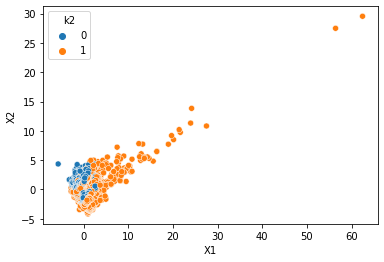

In [39]:
sns.scatterplot(data=x12, x="X1", y="X2", hue = 'k2');

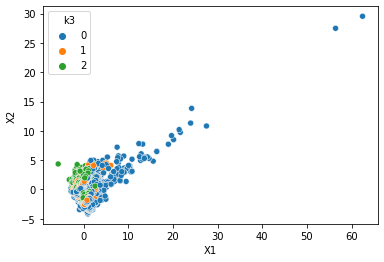

In [40]:
sns.scatterplot(data=x12, x="X1", y="X2", hue = 'k3');

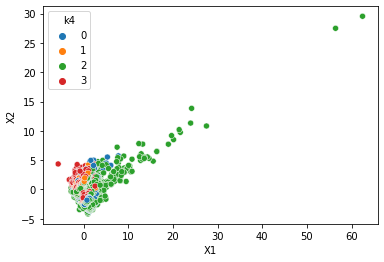

In [41]:
sns.scatterplot(data=x12, x="X1", y="X2", hue = 'k4');

In [42]:
sns.scatterplot(data=x12, x="X1", y="X2", hue = 'k5');

In [43]:
pca=PCA(n_components=3)
pca.fit(scaled_data)
x1=pca.transform(scaled_data)
print(x1.shape)
print(pca.components_)

(20640, 3)
[[ 0.24780531 -0.03906526  0.56020039  0.47047838 -0.14594709 -0.01550618
   0.4236291  -0.40849806  0.18444183]
 [ 0.39894903 -0.17439134  0.3159562   0.20737551  0.1187762   0.00234477
  -0.52645869  0.50171703  0.35299064]
 [-0.5001662  -0.22110647  0.26585486  0.47503472  0.09960734  0.00720466
  -0.08868644  0.2431445  -0.57240794]]


In [44]:
x2 = pd.DataFrame(x1,columns = ['X1','X2','X3'])
x2

X1        X2        X3
0      2.346543  0.346441 -3.028503
1      1.761367  0.438124 -2.151692
2      2.330312 -0.126208 -2.236715
3      1.537078 -0.810004 -2.019956
4      1.416914 -1.121116 -1.493024
...         ...       ...       ...
20635  0.602464 -2.251757  0.910737
20636  1.264302 -1.815928  1.016440
20637  0.687380 -2.056770  0.948383
20638  0.828435 -2.073240  0.954093
20639  0.771440 -1.832743  0.880292

[20640 rows x 3 columns]

In [45]:
x21=x2.copy()
x22=x2.copy()

In [46]:
def KmeansL2(k):
  kmeans = KMeans(n_clusters=k, random_state=49, n_init="auto", tol=1e-3).fit(x21)
  x21[f'k{k}'] = kmeans.labels_

In [47]:
for k in range(2,6):
  KmeansL2(k)

In [48]:
x21

X1        X2        X3  k2  k3  k4  k5
0      2.346543  0.346441 -3.028503   0   0   3   4
1      1.761367  0.438124 -2.151692   0   0   3   4
2      2.330312 -0.126208 -2.236715   0   0   3   4
3      1.537078 -0.810004 -2.019956   0   0   0   0
4      1.416914 -1.121116 -1.493024   0   0   0   0
...         ...       ...       ...  ..  ..  ..  ..
20635  0.602464 -2.251757  0.910737   0   0   0   0
20636  1.264302 -1.815928  1.016440   0   0   0   0
20637  0.687380 -2.056770  0.948383   0   0   0   0
20638  0.828435 -2.073240  0.954093   0   0   0   0
20639  0.771440 -1.832743  0.880292   0   0   0   0

[20640 rows x 7 columns]

In [49]:
def KmeansL1(k):
    kmeans = KMeansL1L2(k, norm='L1',tol = 1e-3,random_state = 49).fit(data)
    x22[f'k{k}'] = kmeans.labels_

In [50]:
for k in range(2,6):
  KmeansL1(k)

In [51]:
x22

X1        X2        X3  k2  k3  k4  k5
0      2.346543  0.346441 -3.028503   1   0   2   1
1      1.761367  0.438124 -2.151692   0   2   1   3
2      2.330312 -0.126208 -2.236715   1   0   2   1
3      1.537078 -0.810004 -2.019956   1   0   2   1
4      1.416914 -1.121116 -1.493024   1   0   2   1
...         ...       ...       ...  ..  ..  ..  ..
20635  0.602464 -2.251757  0.910737   1   0   2   4
20636  1.264302 -1.815928  1.016440   1   0   2   1
20637  0.687380 -2.056770  0.948383   1   0   0   4
20638  0.828435 -2.073240  0.954093   1   0   2   1
20639  0.771440 -1.832743  0.880292   1   1   0   0

[20640 rows x 7 columns]